In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

In [ ]:
dataset= pd.read_csv("/content/sample_data/california_housing_test.csv")


In [ ]:
dataset


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
dataset.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [ ]:
dataset.shape

(3000, 9)

In [ ]:
dataset.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


In [ ]:
correlation= dataset.corr()



<Axes: >

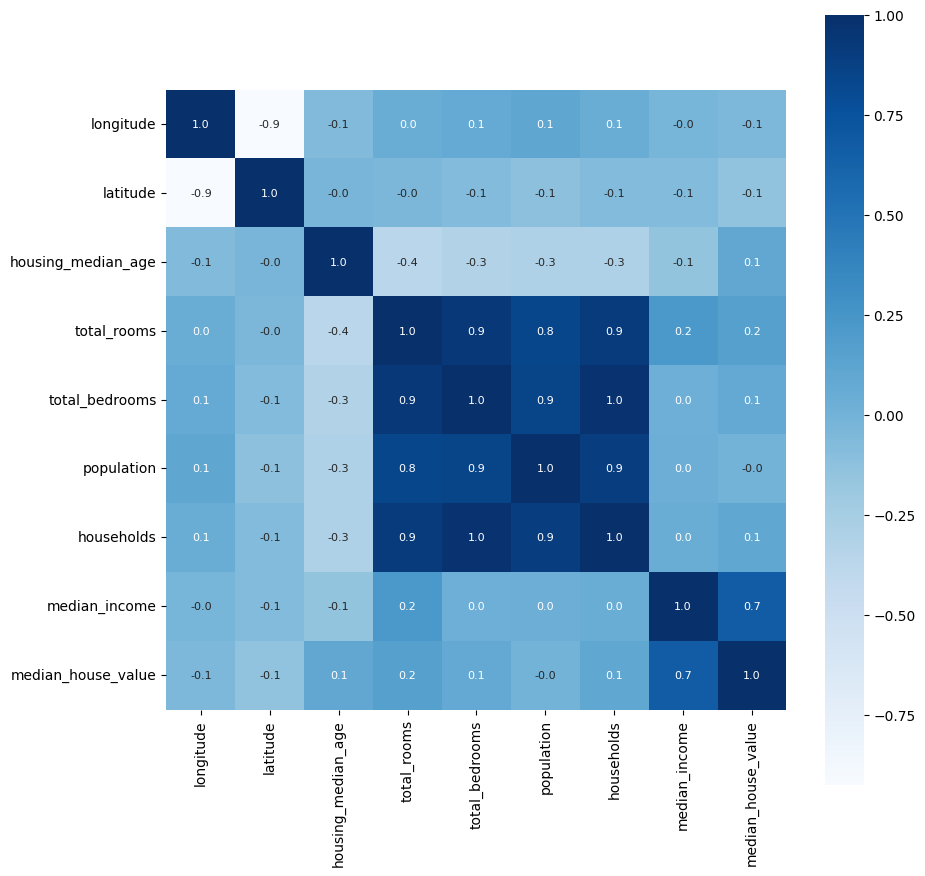

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
x = dataset.drop('median_house_value', axis=1)
y= dataset['median_house_value']


In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375
...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708


In [ ]:
y

,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0
...,...
2995,225000.0
2996,237200.0
2997,62000.0
2998,162500.0


In [ ]:
x_train,x_test, y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(3000, 8) (2400, 8) (600, 8)


In [ ]:
model= LinearRegression()


In [ ]:
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
model.prediction= model.predict(x_test)


In [ ]:
model.prediction

array([149200.9540841 ,  43642.42261905, 306229.7134611 ,  74027.02887176,
       280974.07530393, 266807.12834417, 205735.45937046, 171325.9040709 ,
       241469.32483425, 143113.52566409, 180192.22083802, 286756.3268751 ,
       275997.30754593, 156634.97029028, 186545.76997068, 232501.8343608 ,
       126044.97264374, 235526.85605753, 122587.98861457, 281432.33946119,
       327389.74817647, 254557.0525319 , 100908.12205436, 276714.49734025,
       114774.45873845, 110163.85402414, 265080.24206979, 481349.28810083,
       161384.3739683 , 140070.87045322,  55761.32244778, 192847.00954685,
       213872.58457931, 214221.4003789 , 173382.95642996, 158415.61838938,
       181070.21397999, 192519.85379205, 194151.53178186, 315727.18763819,
       216836.39620093, 145683.73645326, 184874.08350106, 278199.30318282,
       116128.03707275, 256637.2277166 , 393507.16995562, 296371.39178929,
        60072.41085051, 295634.35081263, 148153.87099431,  98501.66402968,
       155295.08253468, 1

In [ ]:
score1= metrics.r2_score(y_test, model.prediction)
score1

0.6197113400203282

In [ ]:
print("r2 score =",score1)

r2 score = 0.6197113400203282


In [ ]:
model2= XGBRegressor()

In [ ]:
model2.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
model.prediction= model2.predict(x_test)

In [ ]:
score1= metrics.r2_score(y_test, model.prediction)
score1

0.7364022906111993

In [ ]:
score2= metrics.r2_score(y_test, model.prediction)
score2
print("mean absolute error score= ", score2)

mean absolute error score=  0.7364022906111993


In [ ]:
input = np.array ([[-118.14,34.06,27.0,	5257.0,	1082.0,	3496.0,	1036.0,	3.3906	]])

In [ ]:
model.predict(input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([178333.89749186])

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))